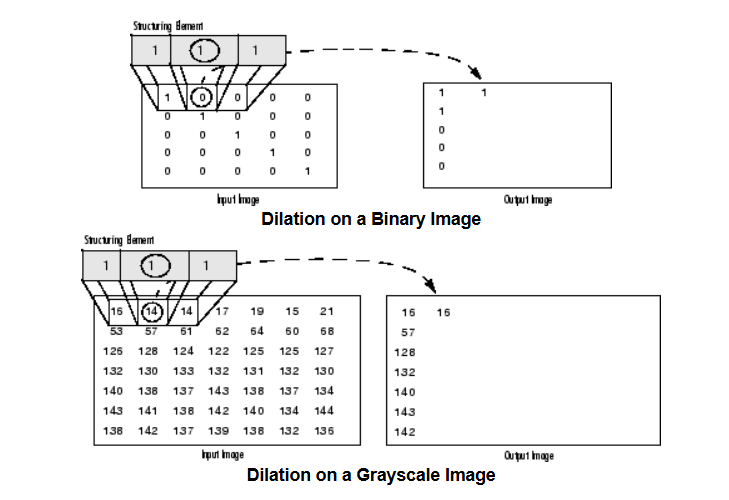

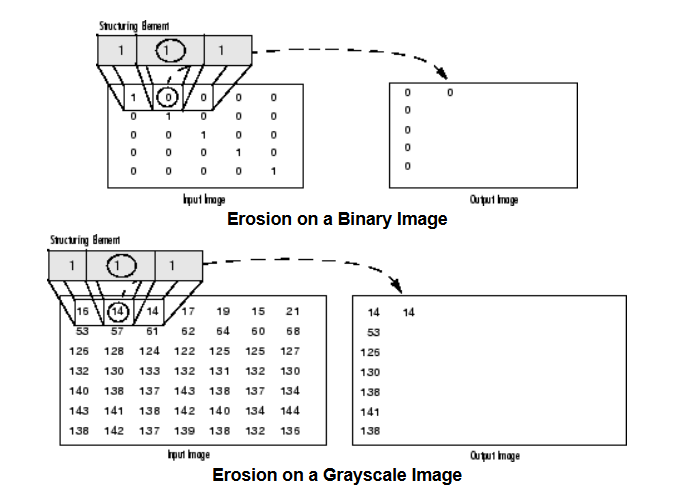

In [4]:
import numpy as np
import sys
import cv2 as cv
import matplotlib.pyplot as plt

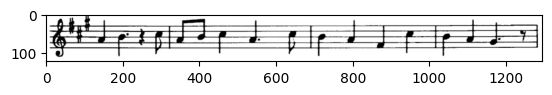

In [5]:
src = cv.imread('../../img/notes.jpg', cv.IMREAD_COLOR)
plt.imshow(src)

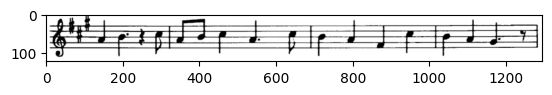

In [7]:
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")

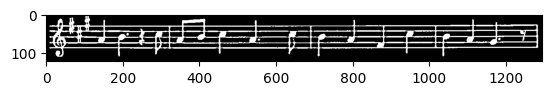

In [8]:
gray = cv.bitwise_not(gray)
bw = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                            cv.THRESH_BINARY, 15, -2)
plt.imshow(bw, cmap="gray")

In [9]:
horizontal = np.copy(bw)
vertical = np.copy(bw)

In [10]:
cols = horizontal.shape[1]
horizontal_size = cols // 30

In [12]:
horizontalStructure = cv.getStructuringElement(cv.MORPH_RECT, (horizontal_size, 1))
horizontalStructure

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
      dtype=uint8)

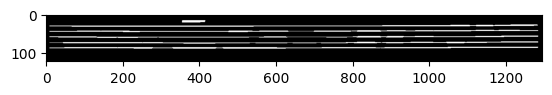

In [13]:
horizontal = cv.erode(horizontal, horizontalStructure)
horizontal = cv.dilate(horizontal, horizontalStructure)
plt.imshow(horizontal, cmap="gray")

In [14]:
rows = vertical.shape[0]
verticalsize = rows // 30

In [16]:
verticalStructure = cv.getStructuringElement(cv.MORPH_RECT, (1, verticalsize))
verticalStructure

array([[1],
       [1],
       [1],
       [1]], dtype=uint8)

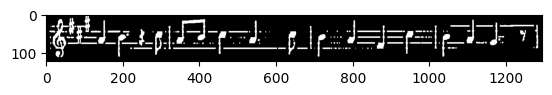

In [17]:
vertical = cv.erode(vertical, verticalStructure)
vertical = cv.dilate(vertical, verticalStructure)
plt.imshow(vertical, cmap="gray")

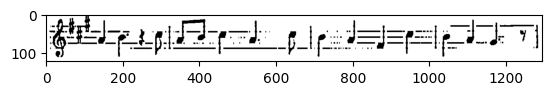

In [18]:
vertical = cv.bitwise_not(vertical)
plt.imshow(vertical, cmap="gray")

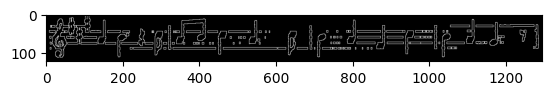

In [19]:
edges = cv.adaptiveThreshold(vertical, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                                cv.THRESH_BINARY, 3, -2)
plt.imshow(edges, cmap="gray")

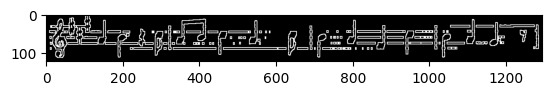

In [20]:
kernel = np.ones((2, 2), np.uint8)
edges = cv.dilate(edges, kernel)
plt.imshow(edges, cmap="gray")

In [21]:
smooth = np.copy(vertical)

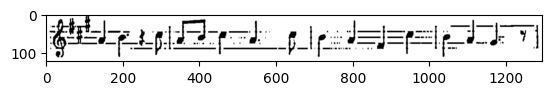

In [22]:
smooth = cv.blur(smooth, (2, 2))
plt.imshow(smooth, cmap="gray")

In [23]:
(rows, cols) = np.where(edges != 0)
vertical[rows, cols] = smooth[rows, cols]


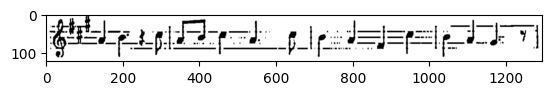

In [24]:
plt.imshow(vertical, cmap="gray")